In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

Need for Reproducability:

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# 2D tensor with random values
X = np.random.randint(low=0, high=1000, size=(1000, 500))
y = X[:, 0] * 0.56438 + 100 + X[:, 2]**3

In [3]:
X.shape, y.shape

((1000, 500), (1000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='softmax'),
    tf.keras.layers.Dense(1)
])
# Using a lower learning rate for the optimizer
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
history = model.fit(X_train, y_train, epochs=200, callbacks=callback)

Epoch 1/200
25/25 [==============================] - 0s 577us/step - loss: 241925440.0000 - mae: 241925440.0000
Epoch 2/200
25/25 [==============================] - 0s 447us/step - loss: 241925408.0000 - mae: 241925408.0000
Epoch 3/200
25/25 [==============================] - 0s 447us/step - loss: 241925424.0000 - mae: 241925424.0000
Epoch 4/200
25/25 [==============================] - 0s 445us/step - loss: 241925392.0000 - mae: 241925392.0000
Epoch 5/200
25/25 [==============================] - 0s 424us/step - loss: 241925424.0000 - mae: 241925424.0000
Epoch 6/200
25/25 [==============================] - 0s 404us/step - loss: 241925440.0000 - mae: 241925440.0000
Epoch 7/200
25/25 [==============================] - 0s 447us/step - loss: 241925424.0000 - mae: 241925424.0000
Epoch 8/200
25/25 [==============================] - 0s 446us/step - loss: 241925424.0000 - mae: 241925424.0000
Epoch 9/200
25/25 [==============================] - 0s 409us/step - loss: 241925408.0000 - mae: 2419254

Text(0.5, 0, 'epoch')

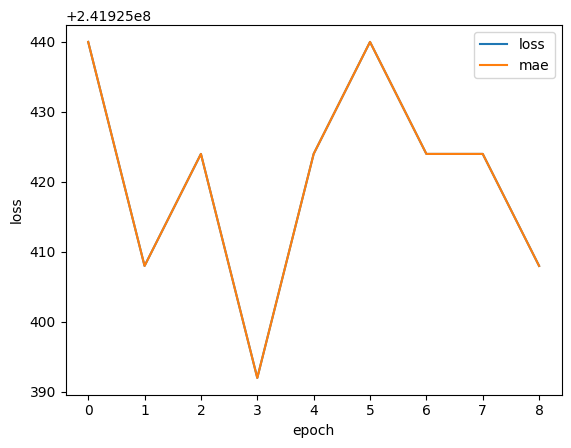

In [27]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

In [28]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

7/7 [==============================] - 0s 524us/step
Mean Squared Error: 1.43930524005881e+17
Mean Absolute Error: 247804222.85899124
R-squared: -0.7441136773289427


**Challenge:**
 
Think of a regression problem you’ve come into contact with before, what it is? If you were going to build a neural network to solve it, what would the inputs be? What would the ideal outputs be?

Send a message with your answer(s) to the #machinelearning-datascience channel on Discord and mention my name (@mrdbourke), I’d love to hear them!